In [247]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Convolutional NN

In [248]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot


from si.data import Dataset
from si.util import to_categorical

Load the MNIST dataset

In [249]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

train,test = load_mnist(500)
train1,test1 = load_mnist(500)
a = 0

In [250]:
def preprocess(data):
    # reshape and normalize input data 
    data.X = data.X.reshape(data.X.shape[0], 28, 28, 1)
    data.X = data.X.astype('float32')
    data.X /= 255
    data.y = to_categorical(data.y)
    return data

In [251]:
train = preprocess(train)
test = preprocess(test)

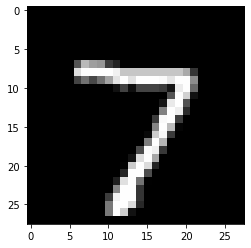

In [252]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [253]:
from si.supervised import NN, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from si.util.activation import Tanh, Sigmoid
from si.util.metrics import cross_entropy, cross_entropy_prime

### Check Conv2D

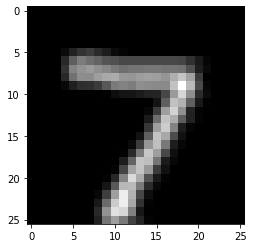

In [254]:
conv = Conv2D((28, 28,1), (3, 3), 1)
out0 = conv.forward(test.X[:1])
plot_img(out0, shape=(26, 26))


### Check MaxPooling

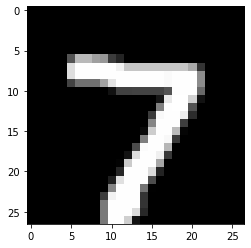

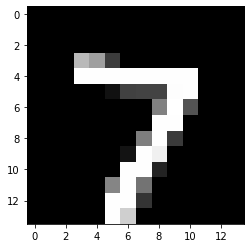

In [255]:
pool = MaxPooling2D(size=2,stride=1)
out = pool.forward(test.X[:1])
plot_img(out, shape=(27, 27))

pool = MaxPooling2D(size=2,stride=2)
out2 = pool.forward(test.X[:1])
plot_img(out2, shape=(14, 14))

Build the model

In [256]:
from si.util.activation import ReLU

# net = NN(epochs=2000,lr=0.1,verbose=False)
net = NN(epochs=100,lr=0.1,verbose=False)
net.add(Conv2D((28, 28,1), (3, 3), 1))
net.add(Activation(Tanh()))
net.add(MaxPooling2D(2,1))
net.add(Flatten())
net.add(Dense(25*25*1, 100))
net.add(Activation(Tanh()))
net.add(Dense(100, 10))
net.add(Activation(Sigmoid()))

Train the model

In [257]:
net.fit(train)

 epoch 1/100 error = 0.3931578891049502
 epoch 2/100 error = 0.3771765706075543
 epoch 3/100 error = 0.36106318953904876
 epoch 4/100 error = 0.34480691759831705
 epoch 5/100 error = 0.32827084692415187
 epoch 6/100 error = 0.3118035553401275
 epoch 7/100 error = 0.29516045046863854
 epoch 8/100 error = 0.27847146862341204
 epoch 9/100 error = 0.26216499685092065
 epoch 10/100 error = 0.2462838561531991
 epoch 11/100 error = 0.23089674239149338
 epoch 12/100 error = 0.21643138162286224
 epoch 13/100 error = 0.202750767512764
 epoch 14/100 error = 0.19048670514269733
 epoch 15/100 error = 0.17985002227829378
 epoch 16/100 error = 0.17073729614810212
 epoch 17/100 error = 0.16276250885528087
 epoch 18/100 error = 0.15576996665113285
 epoch 19/100 error = 0.14944800093490815
 epoch 20/100 error = 0.14375770056366757
 epoch 21/100 error = 0.1388294936336608
 epoch 22/100 error = 0.13447152488896058
 epoch 23/100 error = 0.13086737561883285
 epoch 24/100 error = 0.12791078608875675
 epoch 2

In [258]:
from si.util.metrics import mse

a = test.X[0:3]
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.y[0:3])
print(net.cost(a, test.y[0:3]))
mse(np.round(out), test.y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.0949768546018036


0.06666666666666667

In [259]:
conv1 = net.layers[0]
act1 = net.layers[1]
pool1 = net.layers[2]

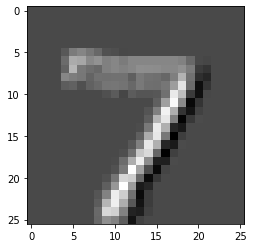

In [260]:
img1 = conv1.forward(test.X[:1])
plot_img(img1,shape=(26,26))


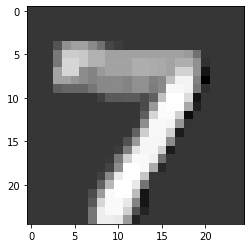

In [261]:
img2= pool1.forward(act1.forward(img1))
plot_img(img2,shape=(25,25))